In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')#, category=FutureWarning)

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
#pd.reset_option(“max_columns”)
#pd.reset_option(“max_rows”)

In [3]:
def plotar (plot_x, plot_y, plot_y_err, parameter, log=False, base=10, yinf=0.9, autoxtick=False):
    
    plt.figure(figsize=(6, 8))
    plt.title("Análise de Sensibilidade aos Hiperparâmetros", fontsize=16)

    plt.xlabel(parameter)
    plt.ylabel("Score")

    ax = plt.gca()
    #ax.set_xlim(0, 402)
    ax.set_ylim(yinf, 1)
    
    if autoxtick==False:
        x_ticks = plot_x
        x_ticks_minor = plot_x
        
        ax.set_xticks(x_ticks)
        ax.set_xticks(x_ticks_minor, minor=True)
    
    y_ticks = np.arange(yinf, 1.001, 0.01)
    y_ticks_minor = np.arange(yinf, 1.00, 0.002)
    ax.set_yticks(y_ticks)
    ax.set_yticks(y_ticks_minor, minor=True)
    ax.grid(which='both')
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
        
    if(log):
        ax.set_xscale('log', basex=base)
        

    #X_axis = np.array(plot_x.data, dtype=object)
    X_axis = np.array(plot_x.data , dtype=float)
    sample_score_mean = np.array(plot_y.data, dtype=float)
    sample_score_std = np.array(plot_y_err.data , dtype=float)
    

    ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                            sample_score_mean + sample_score_std, color='b', alpha=0.1)

    ax.plot(X_axis, sample_score_mean, color='b',
                    alpha=0.7,
                    label="R2-Score (cross-validation)")

    
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

In [4]:
def plot_category (plot_x, plot_y, plot_y_err, parameter, yinf=0.9):
    plt.figure(figsize=(6, 8))
    plt.title("Análise de Sensibilidade aos Hiperparâmetros", fontsize=16)

    plt.xlabel(parameter)
    plt.ylabel("Score")

    ax = plt.gca()
    #ax.set_xlim(0, 402)
    ax.set_ylim(yinf, 1)
    
    #if autoxtick==False:
    #    x_ticks = plot_x
    #    x_ticks_minor = plot_x
        
    #    ax.set_xticks(x_ticks)
    #    ax.set_xticks(x_ticks_minor, minor=True)
    
    y_ticks = np.arange(yinf, 1.001, 0.01)
    y_ticks_minor = np.arange(yinf, 1.00, 0.002)
    ax.set_yticks(y_ticks)
    ax.set_yticks(y_ticks_minor, minor=True)
    ax.grid(which='both')
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
        
    #if(log):
    #    ax.set_xscale('log', basex=base)
        

    #X_axis = np.array(plot_x.data, dtype=object)
    
    X_axis = list(plot_x)
    sample_score_mean = np.array(plot_y.data, dtype=float)
    sample_score_std = np.array(plot_y_err.data , dtype=float)
    
    x_pos = np.arange(len(X_axis))
    y_err = sample_score_std
    #y_err = [0.001, 0.002, 0.003]
    ax.bar(x_pos, sample_score_mean, yerr=y_err, align='center', alpha=0.7, ecolor='black', capsize=10)
    #ax.bar(x_pos, sample_score_mean, y_err, align='center', alpha=0.5, ecolor='black')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(X_axis)
    
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

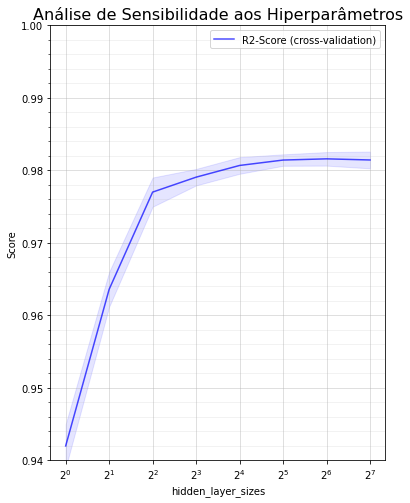

In [5]:
#results_linear
results_lin = pd.read_pickle("results_8_linear")
parameter = 'hidden_layer_sizes'
#plot_x = results_lin['param_hidden_layer_sizes']
plot_x = pd.Series([1, 2, 4, 8, 16, 32, 64, 128])
plot_y = results_lin['mean_test_score']
plot_y_err = results_lin['std_test_score']

plot_x.describe()

plotar(plot_x, plot_y, plot_y_err, parameter, log=True, base=2, yinf=0.94)

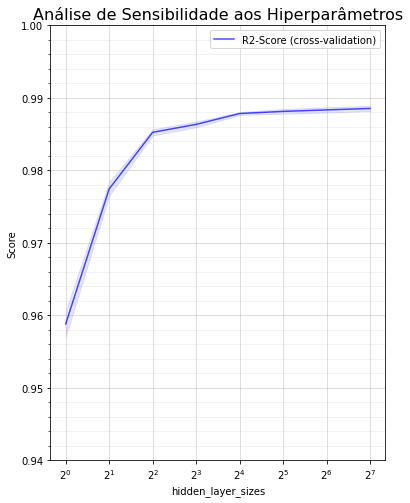

In [6]:
#results_sqrt
results_sqrt = pd.read_pickle("results_8_sqrt")
parameter = 'hidden_layer_sizes'
#plot_x = results_sqrt['param_hidden_layer_sizes']
plot_x = pd.Series([1, 2, 4, 8, 16, 32, 64, 128])
plot_y = results_sqrt['mean_test_score']
plot_y_err = results_sqrt['std_test_score']

plot_x.describe()

plotar(plot_x, plot_y, plot_y_err, parameter, log=True, base=2, yinf=0.94)

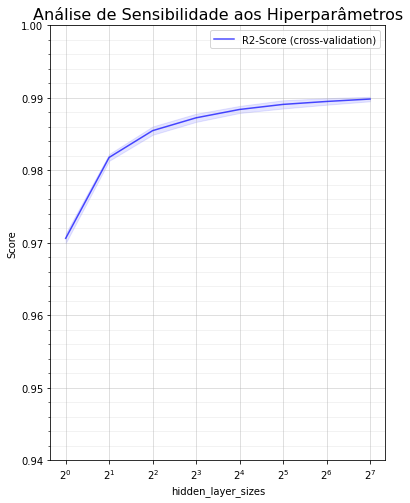

In [7]:
#results_log
results_log = pd.read_pickle("results_8_log")
parameter = 'hidden_layer_sizes'
plot_x = pd.Series([1, 2, 4, 8, 16, 32, 64, 128])
plot_y = results_log['mean_test_score']
plot_y_err = results_log['std_test_score']
results_log
plotar(plot_x, plot_y, plot_y_err, parameter, log=True, base=2, yinf=0.94)

In [8]:
results = pd.read_pickle("results_72")

solver = results[results['param_solver'].notnull()]
learning_rate_init = results[results['param_learning_rate_init'].notnull()]
activation = results[results['param_activation'].notnull()]
early_stopping = results[results['param_validation_fraction'].notnull()]
alpha = results[results['param_alpha'].notnull()]
tol = results[27:35]
layer1 = results[35:45]
layer2 = results[45:55]
layer3 = results[55:63]
layer4 = results[63:]

learning_rate_init = learning_rate_init.sort_values('param_learning_rate_init').reset_index()
early_stopping = early_stopping.sort_values('param_validation_fraction').reset_index()
alpha = alpha.sort_values('param_alpha').reset_index()
tol = tol.sort_values('param_tol').reset_index()

results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_max_iter,param_solver,param_tol,param_learning_rate_init,param_activation,param_early_stopping,param_validation_fraction,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,4.624305,0.543939,0.006001,4.238221e-07,"(32, 32)",5000,sgd,0.0001,NaN,NaN,NaN,NaN,NaN,"{'hidden_layer_sizes': (32, 32), 'max_iter': 5...",0.981109,0.979856,0.981129,0.981110,0.979184,0.979858,0.979377,0.979701,0.978935,0.979678,0.979994,0.000785,60
1,3.441179,0.330590,0.006802,3.997566e-04,"(32, 32)",5000,adam,0.0001,NaN,NaN,NaN,NaN,NaN,"{'hidden_layer_sizes': (32, 32), 'max_iter': 5...",0.986939,0.985690,0.986373,0.986640,0.985068,0.986201,0.985710,0.985496,0.985004,0.985547,0.985867,0.000616,49
2,21.229384,10.845027,0.027405,2.498817e-03,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,{'learning_rate_init': 0.1},0.950955,0.925936,0.920690,0.919206,0.976051,0.964271,0.955453,0.727868,0.878645,0.970639,0.918971,0.069665,70
3,28.756789,8.842553,0.021204,6.008393e-04,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,{'learning_rate_init': 0.01},0.988086,0.987750,0.988668,0.986059,0.987334,0.987813,0.986605,0.986549,0.985914,0.987279,0.987206,0.000859,37
4,79.947864,24.693997,0.022704,2.193557e-03,NaN,NaN,NaN,NaN,0.001,NaN,NaN,NaN,NaN,{'learning_rate_init': 0.001},0.988730,0.988059,0.988984,0.988492,0.988099,0.988098,0.988563,0.987882,0.987675,0.988187,0.988277,0.000384,14
5,135.376774,13.820351,0.021404,1.562569e-03,NaN,NaN,NaN,NaN,0.0001,NaN,NaN,NaN,NaN,{'learning_rate_init': 0.0001},0.988675,0.987730,0.988465,0.988439,0.987553,0.987911,0.987809,0.987519,0.987351,0.988002,0.987946,0.000425,24
6,388.281841,26.878442,0.020004,1.483888e-03,NaN,NaN,NaN,NaN,1e-05,NaN,NaN,NaN,NaN,{'learning_rate_init': 1e-05},0.987665,0.986869,0.986877,0.987172,0.986621,0.986811,0.986194,0.986369,0.986174,0.986571,0.986732,0.000433,42
7,72.058172,15.033945,0.021804,3.999238e-04,NaN,NaN,NaN,NaN,NaN,tanh,NaN,NaN,NaN,{'activation': 'tanh'},0.988920,0.988299,0.988971,0.988846,0.987899,0.988314,0.987932,0.988111,0.987075,0.988315,0.988268,0.000544,15
8,64.082514,11.774816,0.023305,6.408359e-04,NaN,NaN,NaN,NaN,NaN,relu,NaN,NaN,NaN,{'activation': 'relu'},0.988710,0.988980,0.988227,0.989217,0.988478,0.988328,0.988533,0.987872,0.988408,0.988785,0.988554,0.000367,5
9,73.512640,24.181902,0.018004,2.098421e-03,NaN,NaN,NaN,NaN,NaN,logistic,NaN,NaN,NaN,{'activation': 'logistic'},0.986515,0.986652,0.987775,0.987563,0.986915,0.986465,0.986100,0.985876,0.986533,0.986728,0.986712,0.000557,44


No handles with labels found to put in legend.


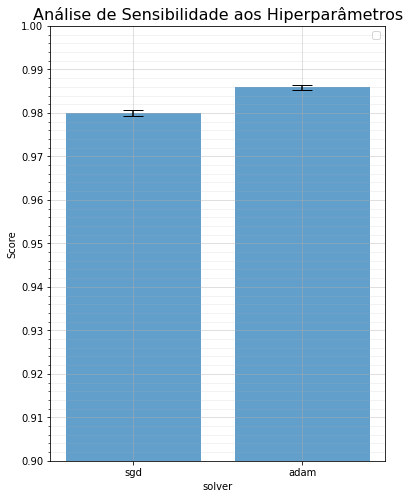

In [9]:
#solver
solver

parameter = 'solver'
plot_x = list(solver['param_solver'])
plot_y = solver['mean_test_score']
plot_y_err = solver['std_test_score']

plot_category(plot_x, plot_y, plot_y_err, parameter, yinf=0.90)


No handles with labels found to put in legend.


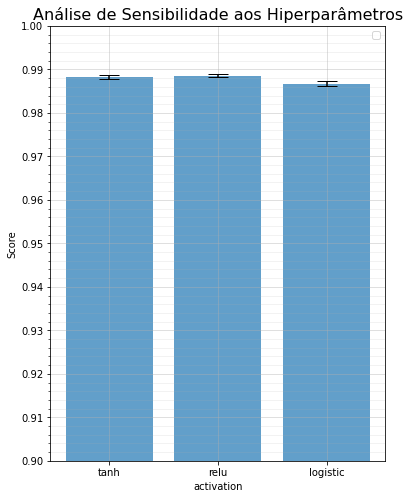

In [10]:
#activation
activation

parameter = 'activation'
plot_x = list(activation['param_activation'])
plot_y = activation['mean_test_score']
plot_y_err = activation['std_test_score']

plot_category(plot_x, plot_y, plot_y_err, parameter, yinf=0.90)


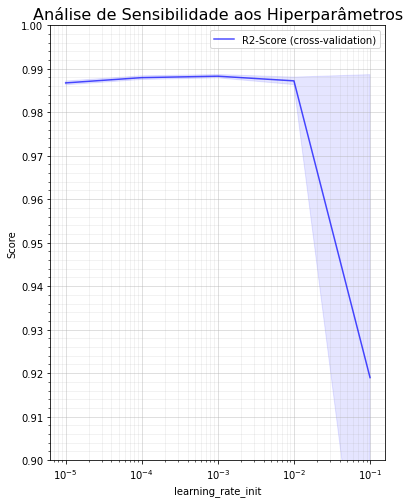

In [11]:
#learning_rate_init
learning_rate_init


parameter = 'learning_rate_init'
plot_x = learning_rate_init['param_learning_rate_init']
plot_y = learning_rate_init['mean_test_score']
plot_y_err = learning_rate_init['std_test_score']

plotar(plot_x, plot_y, plot_y_err, parameter, log=True, base=10, yinf=0.9)

#learning_rate_init

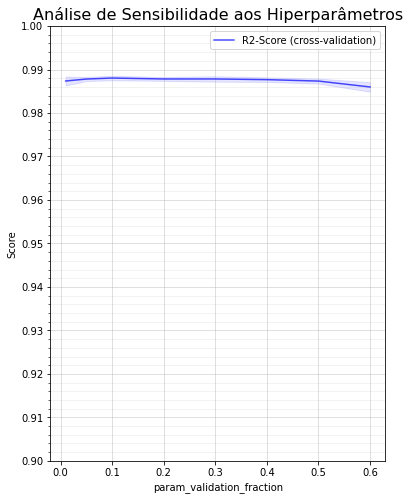

In [12]:
#early_stopping
early_stopping

parameter = 'param_validation_fraction'
plot_x = early_stopping['param_validation_fraction']
plot_x = pd.Series(plot_x)
plot_y = early_stopping['mean_test_score']
plot_y_err = early_stopping['std_test_score']

plot_x

plotar(plot_x, plot_y, plot_y_err, parameter, log=False, autoxtick=True)

#early_stopping

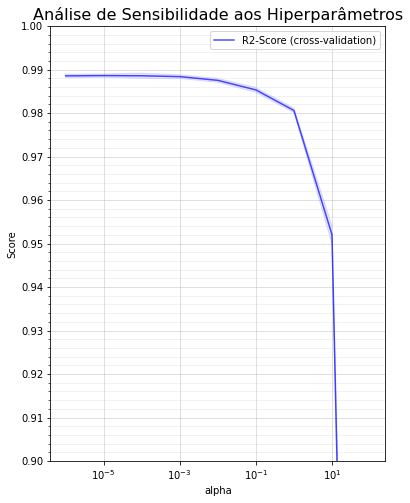

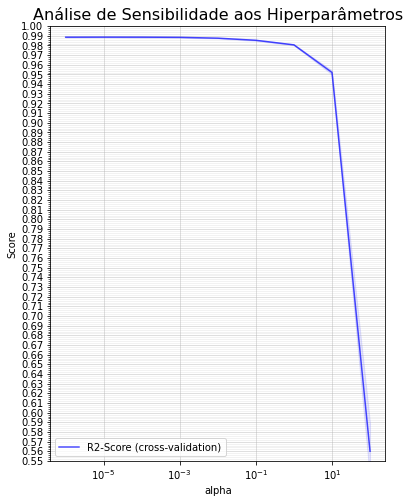

0      0.000001
1      0.000010
2      0.000100
3      0.001000
4      0.010000
5      0.100000
6      1.000000
7     10.000000
8    100.000000
dtype: float64

In [13]:
#alpha
alpha

parameter = 'alpha'
plot_x = alpha['param_alpha']
plot_x = pd.Series([1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
plot_y = alpha['mean_test_score']
plot_y_err = alpha['std_test_score']

plotar(plot_x, plot_y, plot_y_err, parameter, log=True, base=10, yinf=0.9)
plotar(plot_x, plot_y, plot_y_err, parameter, log=True, base=10, yinf=0.55)

#alpha
plot_x

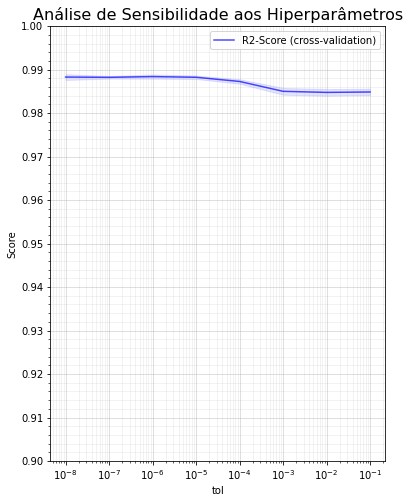

In [14]:
#tol
tol

parameter = 'tol'
plot_x = tol['param_tol']
plot_y = tol['mean_test_score']
plot_y_err = tol['std_test_score']

plotar(plot_x, plot_y, plot_y_err, parameter, log=True, base=10)

#tol

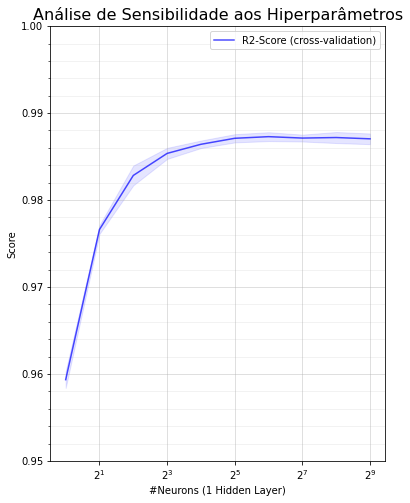

In [15]:
# 1 Hidden Layer
layer1

parameter = '#Neurons (1 Hidden Layer)'

plot_x = pd.Series([1, 2, 4, 8, 16, 32, 64, 128, 256, 512])
plot_y = layer1['mean_test_score']
plot_y_err = layer1['std_test_score']

#plot_x.describe()

plotar(plot_x, plot_y, plot_y_err, parameter, log=True, base=2, yinf=0.95)

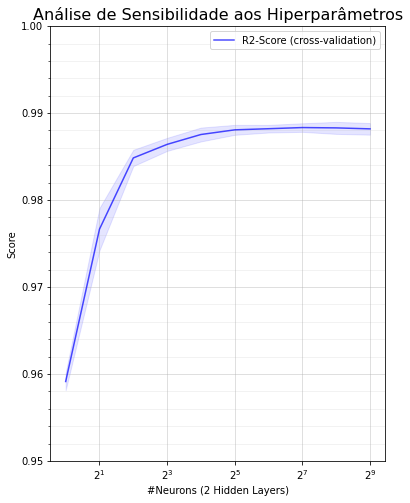

In [16]:
# 2 Hidden Layer
layer2

parameter = '#Neurons (2 Hidden Layers)'

plot_x = pd.Series([1, 2, 4, 8, 16, 32, 64, 128, 256, 512])
plot_y = layer2['mean_test_score']
plot_y_err = layer2['std_test_score']

#plot_x.describe()

plotar(plot_x, plot_y, plot_y_err, parameter, log=True, base=2, yinf=0.95)

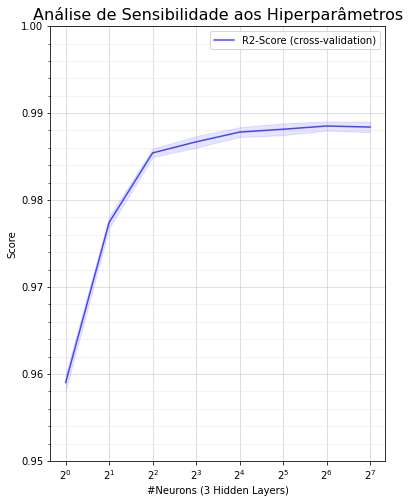

In [17]:
# 3 Hidden Layer
layer3

parameter = '#Neurons (3 Hidden Layers)'

plot_x = pd.Series([1, 2, 4, 8, 16, 32, 64, 128])
plot_y = layer3['mean_test_score']
plot_y_err = layer3['std_test_score']

#plot_x.describe()

plotar(plot_x, plot_y, plot_y_err, parameter, log=True, base=2, yinf=0.95)

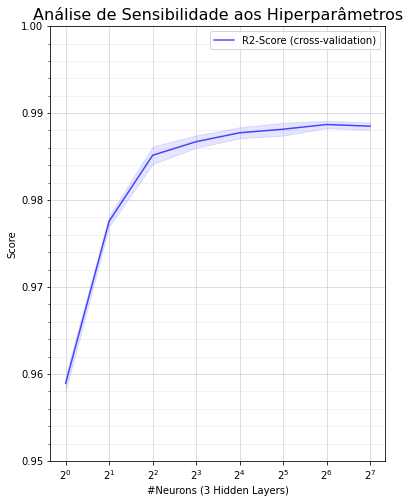

In [18]:
# 4 Hidden Layer
layer4

parameter = '#Neurons (3 Hidden Layers)'

plot_x = pd.Series([1, 2, 4, 8, 16, 32, 64, 128])
plot_y = layer4['mean_test_score']
plot_y_err = layer4['std_test_score']

#plot_x.describe()

plotar(plot_x, plot_y, plot_y_err, parameter, log=True, base=2, yinf=0.95)